# Team project task
#### Members:
- Jelmer Spreen
- Geetanshu Tehlan
- Po-Kuang Chen
- Odin Efren Del Toro Reyna

### Description: This program uses the simple moving average to determine when to buy and sell stock

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Stock: NVDA with budget 50000 and no fixed deposit

In [2]:
# Choose stock
Stock = 'NVDA'
# Windows for short - long
windowShort = 62
windowLong = 100
# Budget for stock
budgetStock = 50000
# Fixed deposit 4%
fixedDeposit = 0
# Load the train data 2013-2019
stockTrainingData = pd.read_excel(f'Test_{Stock}.xlsx',index_col='Date',parse_dates = True)
#stockTrainingData.index = pd.to_datetime(stockTrainingData['Date'])
#stockTrainingData.drop(['Date'], axis = 'columns', inplace=True)
# Show the train data
stockTrainingData

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,59.687500,59.977501,59.180000,59.977501,59.744041,23753600
2020-01-03,58.775002,59.457500,58.525002,59.017502,58.787773,20538400
2020-01-06,58.080002,59.317501,57.817501,59.264999,59.034306,26263600
2020-01-07,59.549999,60.442501,59.097500,59.982498,59.749023,31485600
2020-01-08,59.939999,60.509998,59.537498,60.095001,59.861084,27710800
...,...,...,...,...,...,...
2024-02-26,797.000000,806.460022,785.049988,790.919983,790.919983,50397300
2024-02-27,793.809998,794.799988,771.619995,787.010010,787.010010,39170500
2024-02-28,776.200012,789.330017,771.250000,776.630005,776.630005,39311000


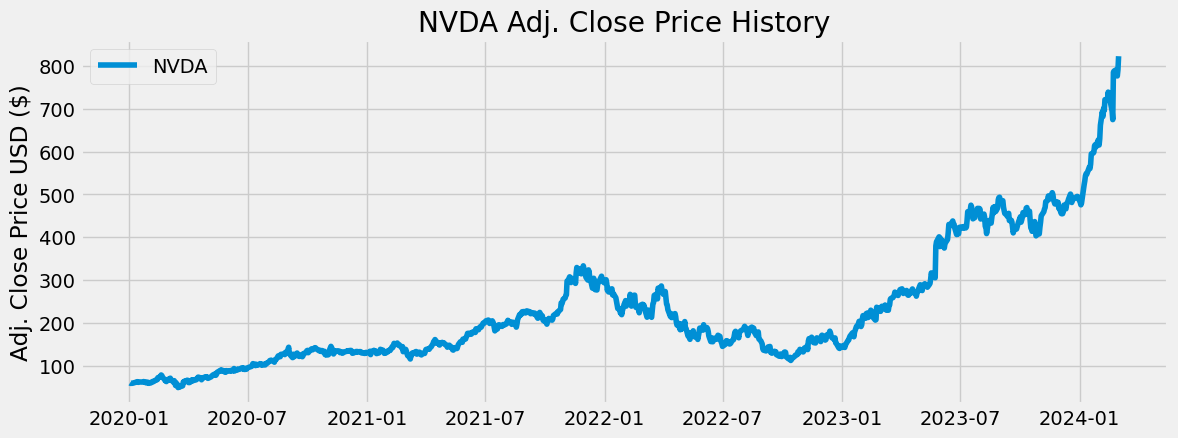

In [3]:
# Visualize the data
plt.figure(figsize=(12.5, 4.5))
plt.plot(stockTrainingData['Adj Close'], label = Stock)
plt.title(f'{Stock} Adj. Close Price History')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [4]:
# Create the simple moving average with a Short window
SMAShort = pd.DataFrame()
SMAShort['Adj Close'] = stockTrainingData['Adj Close'].rolling(window = windowShort).mean()
SMAShort

,Adj Close
Date,
2020-01-02,NaN
2020-01-03,NaN
2020-01-06,NaN
2020-01-07,NaN
2020-01-08,NaN
...,...
2024-02-26,572.473241
2024-02-27,577.386667
2024-02-28,582.200571


In [5]:
# Create the simple moving average with a Long window
SMALong = pd.DataFrame()
SMALong['Adj Close'] = stockTrainingData['Adj Close'].rolling(window = windowLong).mean()
SMALong

,Adj Close
Date,
2020-01-02,NaN
2020-01-03,NaN
2020-01-06,NaN
2020-01-07,NaN
2020-01-08,NaN
...,...
2024-02-26,527.156267
2024-02-27,530.675050
2024-02-28,534.037637


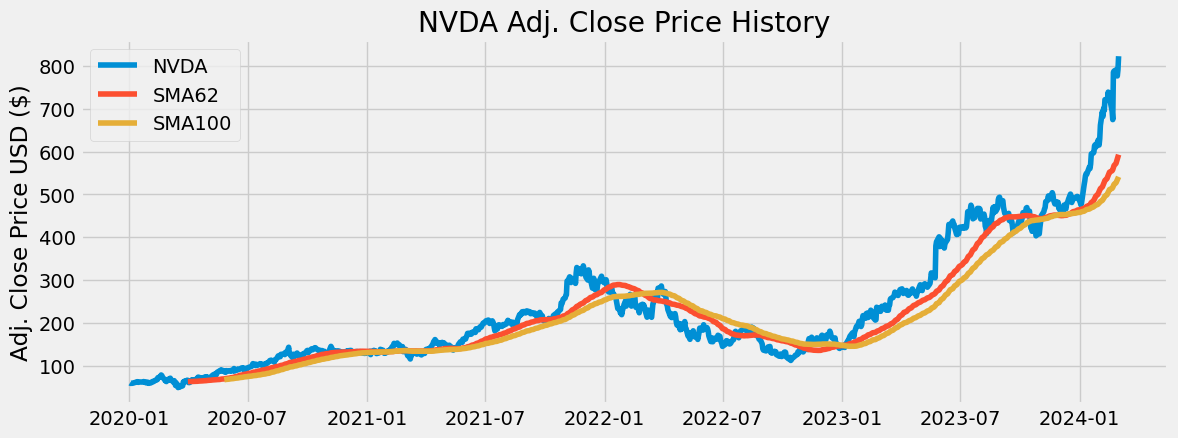

In [6]:
# Visualize the data
plt.figure(figsize=(12.5, 4.5))
plt.plot(stockTrainingData['Adj Close'], label = Stock)
plt.plot(SMAShort['Adj Close'], label = f'SMA{windowShort}')
plt.plot(SMALong['Adj Close'], label = f'SMA{windowLong}')
plt.title(f'{Stock} Adj. Close Price History')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [7]:
# SMAShort > SMALong Signal to buysell when SMAShort cross up SMALong
# SMAShort < SMALong Signal to sell when SMAShort cross down SMALong
# Create a new data frame to store all the data
data = pd.DataFrame()
data[f'{Stock}'] = stockTrainingData['Adj Close']
data[f'SMA{windowShort}'] = SMAShort['Adj Close']
data[f'SMA{windowLong}'] = SMALong['Adj Close']
data

,NVDA,SMA62,SMA100
Date,,,
2020-01-02,59.744041,NaN,NaN
2020-01-03,58.787773,NaN,NaN
2020-01-06,59.034306,NaN,NaN
2020-01-07,59.749023,NaN,NaN
2020-01-08,59.861084,NaN,NaN
...,...,...,...
2024-02-26,790.919983,572.473241,527.156267
2024-02-27,787.010010,577.386667,530.675050
2024-02-28,776.630005,582.200571,534.037637


In [8]:
# Create a function to signal when to buy and sell the stock with long trend
def buy_sell_long(data):
    status = 0
    PriceBuy = []
    PriceSell = []
    Revenue = []
    tempBuyPrice = -1
    BuySignal = []
    SellSignal = []
    
    for i in range(len(data)):
        if data[f'SMA{windowShort}'][i] > data[f'SMA{windowLong}'][i]:
            # signal to buy
            if status != 1:
                PriceBuy.append(data[f'{Stock}'][i+1])
                PriceSell.append(np.nan)
                tempBuyPrice = data[f'{Stock}'][i+1]
                Revenue.append(np.nan)
                status = 1
                BuySignal.append(1)
                SellSignal.append(np.nan)
            else:
                PriceBuy.append(np.nan)
                PriceSell.append(np.nan)
                Revenue.append(np.nan)
                BuySignal.append(np.nan)
                SellSignal.append(np.nan)
        elif data[f'SMA{windowShort}'][i] < data[f'SMA{windowLong}'][i]:
            # signal to sell
            if status != 0:
                PriceBuy.append(np.nan)
                PriceSell.append(data[f'{Stock}'][i+1])
                Revenue.append(data[f'{Stock}'][i+1] - tempBuyPrice)
                status = 0
                BuySignal.append(np.nan)
                SellSignal.append(1)
            else:
                PriceBuy.append(np.nan)
                PriceSell.append(np.nan)
                Revenue.append(np.nan)
                BuySignal.append(np.nan)
                SellSignal.append(np.nan)
        else:
            PriceBuy.append(np.nan)
            PriceSell.append(np.nan)
            Revenue.append(np.nan)
            BuySignal.append(np.nan)
            SellSignal.append(np.nan)
                
    return(PriceBuy, PriceSell, Revenue, BuySignal, SellSignal)

In [9]:
# Store the buy and sell data into a variable
buy_sell_long = buy_sell_long(data)
data['BuyPrice'] = buy_sell_long[0]
data['SellPrice'] = buy_sell_long[1]
data['Revenue'] = buy_sell_long[2]
data['Buy'] = buy_sell_long[3]
data['Sell'] = buy_sell_long[4]

In [10]:
# Show the data
data

,NVDA,SMA62,SMA100,BuyPrice,SellPrice,Revenue,Buy,Sell
Date,,,,,,,,
2020-01-02,59.744041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,58.787773,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,59.034306,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,59.749023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,59.861084,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-02-26,790.919983,572.473241,527.156267,NaN,NaN,NaN,NaN,NaN
2024-02-27,787.010010,577.386667,530.675050,NaN,NaN,NaN,NaN,NaN
2024-02-28,776.630005,582.200571,534.037637,NaN,NaN,NaN,NaN,NaN


In [11]:
# Show buying stocks
BuyShares = data['BuyPrice'].dropna()
BuyShares

Date
2020-05-26     84.971458
2021-02-16    148.724808
2021-02-19    143.234695
2023-01-04    142.586731
2023-12-18    496.040009
Name: BuyPrice, dtype: float64

In [12]:
# Show selling stocks
SellShares = data['SellPrice'].dropna()
SellShares

Date
2021-02-08    142.311798
2021-02-17    147.956543
2022-03-01    241.907608
2023-11-28    481.357666
Name: SellPrice, dtype: float64

In [13]:
# Show revenue from stocks
RevenueShares = data['Revenue'].dropna()
print(f'Revenue stock: {sum(RevenueShares)}')

Revenue stock: 494.0159225463868


In [14]:
# Calculate Profit Loss for budget assigned Buy times + 1
BuySharesLength = len(BuyShares)
SellSharesLength = len(SellShares)
if BuySharesLength == 2 and SellSharesLength == 1:
    Buy0 = budgetStock / BuyShares[0]
    Sell0 = SellShares[0] * Buy0
    Buy1 = Sell0 / BuyShares[1]
    ProfitLoss = (Buy1 * BuyShares[1]) - budgetStock
    print(f'Buy times: {BuySharesLength}, Sell times: {SellSharesLength}')
    print(f'Profit Loss for {budgetStock} budget: {ProfitLoss}')
elif BuySharesLength == 3 and SellSharesLength == 2:
    Buy0 = budgetStock / BuyShares[0]
    Sell0 = SellShares[0] * Buy0
    Buy1 = Sell0 / BuyShares[1]
    Sell1 = SellShares[1] * Buy1
    Buy2 = Sell1 / BuyShares[2]
    ProfitLoss = (Buy2 * BuyShares[2]) - budgetStock
    print(f'Buy times: {BuySharesLength}, Sell times: {SellSharesLength}')
    print(f'Profit Loss for {budgetStock} budget: {ProfitLoss}')
elif BuySharesLength == 4 and SellSharesLength == 3:
    Buy0 = budgetStock / BuyShares[0]
    Sell0 = SellShares[0] * Buy0
    Buy1 = Sell0 / BuyShares[1]
    Sell1 = SellShares[1] * Buy1
    Buy2 = Sell1 / BuyShares[2]
    Sell2 = SellShares[2] * Buy2
    Buy3 = Sell2 / BuyShares[3]
    ProfitLoss = (Buy3 * BuyShares[3]) - budgetStock
    print(f'Buy times: {BuySharesLength}, Sell times: {SellSharesLength}')
    print(f'Profit Loss for {budgetStock} budget: {ProfitLoss}')
elif BuySharesLength == 5 and SellSharesLength == 4:
    Buy0 = budgetStock / BuyShares[0]
    Sell0 = SellShares[0] * Buy0
    Buy1 = Sell0 / BuyShares[1]
    Sell1 = SellShares[1] * Buy1
    Buy2 = Sell1 / BuyShares[2]
    Sell2 = SellShares[2] * Buy2
    Buy3 = Sell2 / BuyShares[3]
    Sell3 = SellShares[3] * Buy3
    Buy4 = Sell3 / BuyShares[4]
    ProfitLoss = (Buy4 * BuyShares[4]) - budgetStock
    print(f'Buy times: {BuySharesLength}, Sell times: {SellSharesLength}')
    print(f'Profit Loss for {budgetStock} budget: {ProfitLoss}')
elif BuySharesLength == 6 and SellSharesLength == 5:
    Buy0 = budgetStock / BuyShares[0]
    Sell0 = SellShares[0] * Buy0
    Buy1 = Sell0 / BuyShares[1]
    Sell1 = SellShares[1] * Buy1
    Buy2 = Sell1 / BuyShares[2]
    Sell2 = SellShares[2] * Buy2
    Buy3 = Sell2 / BuyShares[3]
    Sell3 = SellShares[3] * Buy3
    Buy4 = Sell3 / BuyShares[4]
    Sell4 = SellShares[4] * Buy4
    Buy5 = Sell4 / BuyShares[5]
    ProfitLoss = (Buy5 * BuyShares[5]) - budgetStock
    print(f'Buy times: {BuySharesLength}, Sell times: {SellSharesLength}')
    print(f'Profit Loss for {budgetStock} budget: {ProfitLoss}')
elif BuySharesLength == 7 and SellSharesLength == 6:
    Buy0 = budgetStock / BuyShares[0]
    Sell0 = SellShares[0] * Buy0
    Buy1 = Sell0 / BuyShares[1]
    Sell1 = SellShares[1] * Buy1
    Buy2 = Sell1 / BuyShares[2]
    Sell2 = SellShares[2] * Buy2
    Buy3 = Sell2 / BuyShares[3]
    Sell3 = SellShares[3] * Buy3
    Buy4 = Sell3 / BuyShares[4]
    Sell4 = SellShares[4] * Buy4
    Buy5 = Sell4 / BuyShares[5]
    Sell5 = SellShares[5] * Buy5
    Buy6 = Sell5 / BuyShares[6]
    ProfitLoss = (Buy6 * BuyShares[6]) - budgetStock
    print(f'Buy times: {BuySharesLength}, Sell times: {SellSharesLength}')
    print(f'Profit Loss for {budgetStock} budget: {ProfitLoss}')
elif BuySharesLength == 8 and SellSharesLength == 7:
    Buy0 = budgetStock / BuyShares[0]
    Sell0 = SellShares[0] * Buy0
    Buy1 = Sell0 / BuyShares[1]
    Sell1 = SellShares[1] * Buy1
    Buy2 = Sell1 / BuyShares[2]
    Sell2 = SellShares[2] * Buy2
    Buy3 = Sell2 / BuyShares[3]
    Sell3 = SellShares[3] * Buy3
    Buy4 = Sell3 / BuyShares[4]
    Sell4 = SellShares[4] * Buy4
    Buy5 = Sell4 / BuyShares[5]
    Sell5 = SellShares[5] * Buy5
    Buy6 = Sell5 / BuyShares[6]
    Sell6 = SellShares[6] * Buy6
    Buy7 = Sell6 / BuyShares[7]
    ProfitLoss = (Buy7 * BuyShares[7]) - budgetStock
    print(f'Buy times: {BuySharesLength}, Sell times: {SellSharesLength}')
    print(f'Profit Loss for {budgetStock} budget: {ProfitLoss}')
elif BuySharesLength == 9 and SellSharesLength == 8:
    Buy0 = budgetStock / BuyShares[0]
    Sell0 = SellShares[0] * Buy0
    Buy1 = Sell0 / BuyShares[1]
    Sell1 = SellShares[1] * Buy1
    Buy2 = Sell1 / BuyShares[2]
    Sell2 = SellShares[2] * Buy2
    Buy3 = Sell2 / BuyShares[3]
    Sell3 = SellShares[3] * Buy3
    Buy4 = Sell3 / BuyShares[4]
    Sell4 = SellShares[4] * Buy4
    Buy5 = Sell4 / BuyShares[5]
    Sell5 = SellShares[5] * Buy5
    Buy6 = Sell5 / BuyShares[6]
    Sell6 = SellShares[6] * Buy6
    Buy7 = Sell6 / BuyShares[7]
    Sell7 = SellShares[7] * Buy7
    Buy8 = Sell7 / BuyShares[8]
    ProfitLoss = (Buy8 * BuyShares[8]) - budgetStock
    print(f'Buy times: {BuySharesLength}, Sell times: {SellSharesLength}')
    print(f'Profit Loss for {budgetStock} budget: {ProfitLoss}')
elif BuySharesLength == 10 and SellSharesLength == 9:
    Buy0 = budgetStock / BuyShares[0]
    Sell0 = SellShares[0] * Buy0
    Buy1 = Sell0 / BuyShares[1]
    Sell1 = SellShares[1] * Buy1
    Buy2 = Sell1 / BuyShares[2]
    Sell2 = SellShares[2] * Buy2
    Buy3 = Sell2 / BuyShares[3]
    Sell3 = SellShares[3] * Buy3
    Buy4 = Sell3 / BuyShares[4]
    Sell4 = SellShares[4] * Buy4
    Buy5 = Sell4 / BuyShares[5]
    Sell5 = SellShares[5] * Buy5
    Buy6 = Sell5 / BuyShares[6]
    Sell6 = SellShares[6] * Buy6
    Buy7 = Sell6 / BuyShares[7]
    Sell7 = SellShares[7] * Buy7
    Buy8 = Sell7 / BuyShares[8]
    Sell8 = SellShares[8] * Buy8
    Buy9 = Sell8 / BuyShares[9]
    ProfitLoss = (Buy9 * BuyShares[9]) - budgetStock
    print(f'Buy times: {BuySharesLength}, Sell times: {SellSharesLength}')
    print(f'Profit Loss for {budgetStock} budget: {ProfitLoss}')
elif BuySharesLength == 11 and SellSharesLength == 10:
    Buy0 = budgetStock / BuyShares[0]
    Sell0 = SellShares[0] * Buy0
    Buy1 = Sell0 / BuyShares[1]
    Sell1 = SellShares[1] * Buy1
    Buy2 = Sell1 / BuyShares[2]
    Sell2 = SellShares[2] * Buy2
    Buy3 = Sell2 / BuyShares[3]
    Sell3 = SellShares[3] * Buy3
    Buy4 = Sell3 / BuyShares[4]
    Sell4 = SellShares[4] * Buy4
    Buy5 = Sell4 / BuyShares[5]
    Sell5 = SellShares[5] * Buy5
    Buy6 = Sell5 / BuyShares[6]
    Sell6 = SellShares[6] * Buy6
    Buy7 = Sell6 / BuyShares[7]
    Sell7 = SellShares[7] * Buy7
    Buy8 = Sell7 / BuyShares[8]
    Sell8 = SellShares[8] * Buy8
    Buy9 = Sell8 / BuyShares[9]
    Sell9 = SellShares[9] * Buy9
    Buy10 = Sell9 / BuyShares[10]
    ProfitLoss = (Buy10 * BuyShares[10]) - budgetStock
    print(f'Buy times: {BuySharesLength}, Sell times: {SellSharesLength}')
    print(f'Profit Loss for {budgetStock} budget: {ProfitLoss}')
elif BuySharesLength == 12 and SellSharesLength == 11:
    Buy0 = budgetStock / BuyShares[0]
    Sell0 = SellShares[0] * Buy0
    Buy1 = Sell0 / BuyShares[1]
    Sell1 = SellShares[1] * Buy1
    Buy2 = Sell1 / BuyShares[2]
    Sell2 = SellShares[2] * Buy2
    Buy3 = Sell2 / BuyShares[3]
    Sell3 = SellShares[3] * Buy3
    Buy4 = Sell3 / BuyShares[4]
    Sell4 = SellShares[4] * Buy4
    Buy5 = Sell4 / BuyShares[5]
    Sell5 = SellShares[5] * Buy5
    Buy6 = Sell5 / BuyShares[6]
    Sell6 = SellShares[6] * Buy6
    Buy7 = Sell6 / BuyShares[7]
    Sell7 = SellShares[7] * Buy7
    Buy8 = Sell7 / BuyShares[8]
    Sell8 = SellShares[8] * Buy8
    Buy9 = Sell8 / BuyShares[9]
    Sell9 = SellShares[9] * Buy9
    Buy10 = Sell9 / BuyShares[10]
    Sell10 = SellShares[10] * Buy10
    Buy11 = Sell10 / BuyShares[11]
    ProfitLoss = (Buy11 * BuyShares[11]) - budgetStock
    print(f'Buy times: {BuySharesLength}, Sell times: {SellSharesLength}')
    print(f'Profit Loss for {budgetStock} budget: {ProfitLoss}')
elif BuySharesLength == 13 and SellSharesLength == 12:
    Buy0 = budgetStock / BuyShares[0]
    Sell0 = SellShares[0] * Buy0
    Buy1 = Sell0 / BuyShares[1]
    Sell1 = SellShares[1] * Buy1
    Buy2 = Sell1 / BuyShares[2]
    Sell2 = SellShares[2] * Buy2
    Buy3 = Sell2 / BuyShares[3]
    Sell3 = SellShares[3] * Buy3
    Buy4 = Sell3 / BuyShares[4]
    Sell4 = SellShares[4] * Buy4
    Buy5 = Sell4 / BuyShares[5]
    Sell5 = SellShares[5] * Buy5
    Buy6 = Sell5 / BuyShares[6]
    Sell6 = SellShares[6] * Buy6
    Buy7 = Sell6 / BuyShares[7]
    Sell7 = SellShares[7] * Buy7
    Buy8 = Sell7 / BuyShares[8]
    Sell8 = SellShares[8] * Buy8
    Buy9 = Sell8 / BuyShares[9]
    Sell9 = SellShares[9] * Buy9
    Buy10 = Sell9 / BuyShares[10]
    Sell10 = SellShares[10] * Buy10
    Buy11 = Sell10 / BuyShares[11]
    Sell11 = SellShares[11] * Buy11
    Buy12 = Sell11 / BuyShares[12]
    ProfitLoss = (Buy12 * BuyShares[12]) - budgetStock
    print(f'Buy times: {BuySharesLength}, Sell times: {SellSharesLength}')
    print(f'Profit Loss for {budgetStock} budget: {ProfitLoss}')
elif BuySharesLength == 14 and SellSharesLength == 13:
    Buy0 = budgetStock / BuyShares[0]
    Sell0 = SellShares[0] * Buy0
    Buy1 = Sell0 / BuyShares[1]
    Sell1 = SellShares[1] * Buy1
    Buy2 = Sell1 / BuyShares[2]
    Sell2 = SellShares[2] * Buy2
    Buy3 = Sell2 / BuyShares[3]
    Sell3 = SellShares[3] * Buy3
    Buy4 = Sell3 / BuyShares[4]
    Sell4 = SellShares[4] * Buy4
    Buy5 = Sell4 / BuyShares[5]
    Sell5 = SellShares[5] * Buy5
    Buy6 = Sell5 / BuyShares[6]
    Sell6 = SellShares[6] * Buy6
    Buy7 = Sell6 / BuyShares[7]
    Sell7 = SellShares[7] * Buy7
    Buy8 = Sell7 / BuyShares[8]
    Sell8 = SellShares[8] * Buy8
    Buy9 = Sell8 / BuyShares[9]
    Sell9 = SellShares[9] * Buy9
    Buy10 = Sell9 / BuyShares[10]
    Sell10 = SellShares[10] * Buy10
    Buy11 = Sell10 / BuyShares[11]
    Sell11 = SellShares[11] * Buy11
    Buy12 = Sell11 / BuyShares[12]
    Sell12 = SellShares[12] * Buy12
    Buy13 = Sell12 / BuyShares[13]
    ProfitLoss = (Buy13 * BuyShares[13]) - budgetStock
    print(f'Buy times: {BuySharesLength}, Sell times: {SellSharesLength}')
    print(f'Profit Loss for {budgetStock} budget: {ProfitLoss}')
elif BuySharesLength == 15 and SellSharesLength == 14:
    Buy0 = budgetStock / BuyShares[0]
    Sell0 = SellShares[0] * Buy0
    Buy1 = Sell0 / BuyShares[1]
    Sell1 = SellShares[1] * Buy1
    Buy2 = Sell1 / BuyShares[2]
    Sell2 = SellShares[2] * Buy2
    Buy3 = Sell2 / BuyShares[3]
    Sell3 = SellShares[3] * Buy3
    Buy4 = Sell3 / BuyShares[4]
    Sell4 = SellShares[4] * Buy4
    Buy5 = Sell4 / BuyShares[5]
    Sell5 = SellShares[5] * Buy5
    Buy6 = Sell5 / BuyShares[6]
    Sell6 = SellShares[6] * Buy6
    Buy7 = Sell6 / BuyShares[7]
    Sell7 = SellShares[7] * Buy7
    Buy8 = Sell7 / BuyShares[8]
    Sell8 = SellShares[8] * Buy8
    Buy9 = Sell8 / BuyShares[9]
    Sell9 = SellShares[9] * Buy9
    Buy10 = Sell9 / BuyShares[10]
    Sell10 = SellShares[10] * Buy10
    Buy11 = Sell10 / BuyShares[11]
    Sell11 = SellShares[11] * Buy11
    Buy12 = Sell11 / BuyShares[12]
    Sell12 = SellShares[12] * Buy12
    Buy13 = Sell12 / BuyShares[13]
    Sell13 = SellShares[13] * Buy13
    Buy14 = Sell13 / BuyShares[14]
    ProfitLoss = (Buy14 * BuyShares[14]) - budgetStock
    print(f'Buy times: {BuySharesLength}, Sell times: {SellSharesLength}')
    print(f'Profit Loss for {budgetStock} budget: {ProfitLoss}')
elif BuySharesLength == 16 and SellSharesLength == 15:
    Buy0 = budgetStock / BuyShares[0]
    Sell0 = SellShares[0] * Buy0
    Buy1 = Sell0 / BuyShares[1]
    Sell1 = SellShares[1] * Buy1
    Buy2 = Sell1 / BuyShares[2]
    Sell2 = SellShares[2] * Buy2
    Buy3 = Sell2 / BuyShares[3]
    Sell3 = SellShares[3] * Buy3
    Buy4 = Sell3 / BuyShares[4]
    Sell4 = SellShares[4] * Buy4
    Buy5 = Sell4 / BuyShares[5]
    Sell5 = SellShares[5] * Buy5
    Buy6 = Sell5 / BuyShares[6]
    Sell6 = SellShares[6] * Buy6
    Buy7 = Sell6 / BuyShares[7]
    Sell7 = SellShares[7] * Buy7
    Buy8 = Sell7 / BuyShares[8]
    Sell8 = SellShares[8] * Buy8
    Buy9 = Sell8 / BuyShares[9]
    Sell9 = SellShares[9] * Buy9
    Buy10 = Sell9 / BuyShares[10]
    Sell10 = SellShares[10] * Buy10
    Buy11 = Sell10 / BuyShares[11]
    Sell11 = SellShares[11] * Buy11
    Buy12 = Sell11 / BuyShares[12]
    Sell12 = SellShares[12] * Buy12
    Buy13 = Sell12 / BuyShares[13]
    Sell13 = SellShares[13] * Buy13
    Buy14 = Sell13 / BuyShares[14]
    Sell14 = SellShares[14] * Buy14
    Buy15 = Sell14 / BuyShares[15]
    ProfitLoss = (Buy15 * BuyShares[15]) - budgetStock
    print(f'Buy times: {BuySharesLength}, Sell times: {SellSharesLength}')
    print(f'Profit Loss for {budgetStock} budget: {ProfitLoss}')
else:
    print('Index out of range')

Buy times: 5, Sell times: 4
Profit Loss for 50000 budget: 424983.66676087666


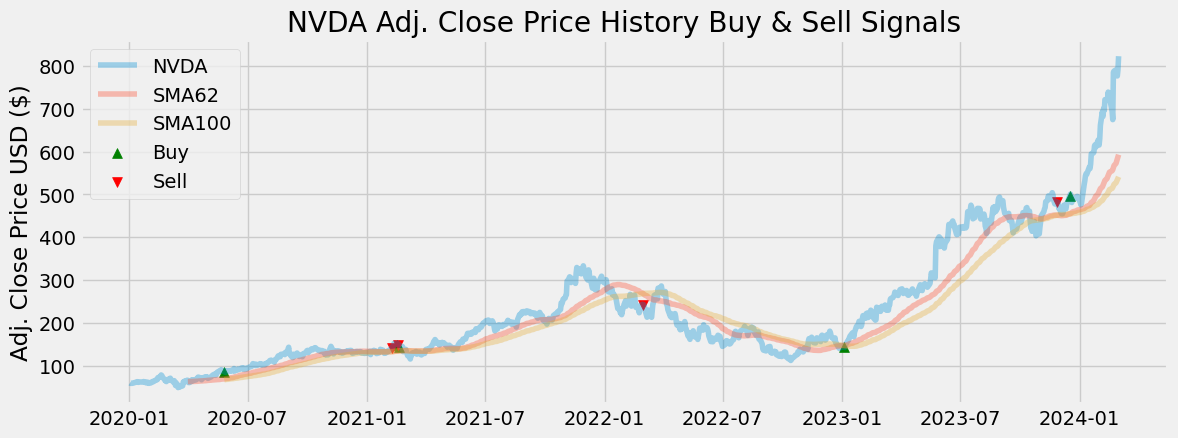

In [15]:
# Visualize the data and the strategy to buy and sell the stock
plt.figure(figsize=(12.5, 4.5))
plt.plot(data[f'{Stock}'], label = Stock, alpha = 0.35)
plt.plot(data[f'SMA{windowShort}'], label = f'SMA{windowShort}', alpha = 0.35)
plt.plot(data[f'SMA{windowLong}'], label = f'SMA{windowLong}', alpha = 0.35)
plt.scatter(data.index, data['BuyPrice'], label = 'Buy', marker = '^', color = 'green', s = 50)
plt.scatter(data.index, data['SellPrice'], label = 'Sell', marker = 'v', color = 'red', s = 50)
plt.title(f'{Stock} Adj. Close Price History Buy & Sell Signals')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

# Budget on the stock market

In [16]:
print(f'The budget allocated for the stock market is: {budgetStock}')
print(f'The fix deposit with 4% annual interest allocated for the stock market is: {fixedDeposit}')

The budget allocated for the stock market is: 50000
The fix deposit with 4% annual interest allocated for the stock market is: 0


# Export to excel

In [17]:
# Create a new data frame to store all the data for the excel export to calculate profit and loss
datatoExcel = pd.DataFrame(stockTrainingData)
datatoExcel = pd.concat([datatoExcel, data], axis=1, join="inner")
datatoExcel = datatoExcel.drop([f'{Stock}',f'SMA{windowShort}',f'SMA{windowLong}','BuyPrice','SellPrice','Revenue'],axis=1)
datatoExcel

,Open,High,Low,Close,Adj Close,Volume,Buy,Sell
Date,,,,,,,,
2020-01-02,59.687500,59.977501,59.180000,59.977501,59.744041,23753600,NaN,NaN
2020-01-03,58.775002,59.457500,58.525002,59.017502,58.787773,20538400,NaN,NaN
2020-01-06,58.080002,59.317501,57.817501,59.264999,59.034306,26263600,NaN,NaN
2020-01-07,59.549999,60.442501,59.097500,59.982498,59.749023,31485600,NaN,NaN
2020-01-08,59.939999,60.509998,59.537498,60.095001,59.861084,27710800,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-02-26,797.000000,806.460022,785.049988,790.919983,790.919983,50397300,NaN,NaN
2024-02-27,793.809998,794.799988,771.619995,787.010010,787.010010,39170500,NaN,NaN
2024-02-28,776.200012,789.330017,771.250000,776.630005,776.630005,39311000,NaN,NaN


In [18]:
# Export data to excel
datatoExcel.to_excel(f"3.result.xlsx",index=True)